## Projet Statistique : Comprendre la Qualité de l'Air : Analyse Exploratoire de Données (EDA)


Dans ce projet notre objectif est de comprendre ce qui influence la Qualité de l'Air (AQI) en utilisant les données fournies. Pour cela, nous allons suivre plusieurs étapes : exploration des données, prétraitement et préparation pour la modélisation.

### 1. Préparation et chargement des données

Nous commençons par importer les bibliothèques nécessaires et charger notre jeu de données.

In [4]:
import numpy as np #Pour les opérations numériques (calculs, tableaux)
import pandas as pd #Pour la manipulation et l'analyse de données tabulaires (DataFrames)
import seaborn as sns #Pour des visualisations statistiques
from matplotlib import pyplot as plt, patches #Pour créer et personnaliser des graphiques
from pandas import DataFrame #Indication de type pour le DataFrame
from typing import Optional #Pour les indications de type optionnelles

In [5]:
#OUTILS D'ANALYSE : TOOLING 
#on a défini nos classes (TOOLING), elles regroupent des fonctions spécifiques pour rendre notre code plus propre

#Classe pour l'analyse globale du dataset
class GlobalAnalysis:
    @staticmethod
    def print_nan_statistics(data: DataFrame) -> None:
        """Affiche le nombre de valeurs manquantes (NaN) par colonne."""
        print(" Missing values in the data ".center(50, "="))
        print(data.isna().sum())

    @staticmethod
    def print_info(data: DataFrame) -> None:
        """Affiche un résumé des informations du DataFrame (types de colonnes, valeurs non-nulles)."""
        print(" Information about the data ".center(50, "="))
        print(data.info())

In [6]:
#Classe pour l'analyse des variables quantitatives numériques
class QuantitativeAnalysis:
    @staticmethod
    def print_describe(data: DataFrame) -> None:
        #Affiche les statistiques descriptives de base pour les colonnes numériques (moyenne, écart-type, min/max)
        print(" Descriptive statistics of the data ".center(50, "="))
        print(data.describe())

    @staticmethod
    def plot_linear_correlation(data: DataFrame, colors: list[str]) -> None:
        #Génère une carte de chaleur (heatmap) des coefficients de corrélation entre toutes les variables numériques
        corr = data.corr(method="pearson") #Calcul des corrélations
        mask = np.triu(np.ones_like(corr, dtype=bool)) #Masque pour n'afficher les valeurs sans les doublons

        plt.figure(figsize=(12, 8)) #Taille du graphique
        plt.title("Coefficient de corrélation linéaire entre les variables", fontsize=13, fontweight="bold")
        sns.heatmap(corr, annot=True, cmap="mako", mask=mask, square=True, alpha=0.6) #Création de la heatmap

        #Ajout d'un cadre autour du graphique
        ax = plt.gca()
        rect = patches.Rectangle((0, 0), 1, data.shape[0], linewidth=1, edgecolor=colors[1], facecolor="none")
        ax.add_patch(rect)

        plt.show() #Affichage du graphique

    @staticmethod
    def plot_pairplot(data: DataFrame, colors: list[str], hue: Optional[str] = None) -> None:
        #Crée une grille de nuages de points et de distributions (pairplot) pour visualiser les relations entre chaque paire de variables
        if hue: #Si une variable de couleur (hue) pour distinguer des groupes
            n_modalities = data.loc[:, hue].nunique()
            sns.pairplot(
                data,
                plot_kws={"alpha": 0.6}, #Transparence des points
                diag_kws={"fill": True, "alpha": 0.6}, #Remplissage de la distribution sur la diagonale
                diag_kind="kde", #Type de distribution (estimation de densité de noyau)
                kind="scatter", #Type de graphique nuage de points
                palette=colors[:n_modalities], #Palette de couleurs
                hue=hue, #Variable pour la couleur des points
            )
        else: #Si pas de variable de couleur spécifiée
            sns.pairplot(
                data,
                plot_kws={"alpha": 0.6, "color": colors[1]},
                diag_kws={"fill": True, "alpha": 0.6, "color": colors[0]},
                diag_kind="kde",
                kind="scatter",
            )
        plt.show()

In [7]:
#Classe pour l'analyse des variables qualitatives (catégorielles)
class QualitativeAnalysis:
    @staticmethod
    def print_modalities_number(data: DataFrame) -> None:
        #Affiche le nombre de catégories uniques pour chaque colonne
        print(data.nunique(axis=0))

    @staticmethod
    def plot_modalities_effect_on_target(
        data: DataFrame, target_column: str, qualitative_column: str, colors: list[str]
    ) -> None:
        #Visualise l'effet des modalités d'une variable qualitative sur la distribution de la variable cible l'AQI
        palette = sns.color_palette(palette=colors, n_colors=data[qualitative_column].nunique())

        plt.figure(figsize=(12, 8))
        sns.kdeplot(
            data=data,
            x=target_column, #Variable cible (AQI)
            hue=qualitative_column, #Variable qualitative pour la distinction des distributions
            palette=palette,
            fill=True,
            alpha=0.6,
        )
        #Ajout des lignes pour la moyenne de la cible par modalité
        for modality in data[qualitative_column].unique():
            plt.axvline(
                x=data[data[qualitative_column] == modality][target_column].mean(),
                color=palette[data[qualitative_column].unique().tolist().index(modality)],
                linestyle="--",
                label=f"{modality} mean",
            )

        plt.title(
            label=f"Effet des modalités de {qualitative_column} sur {target_column}",
            fontsize=13,
            fontweight="bold",
        )
        plt.ylabel("Densité") #Axe Y représente la densité de la distribution
        plt.grid(True) #Affichage de la grille
        plt.show()

### 2. Chargement des Données

La première étape concrète est de charger notre dataset dans un DataFrame. C'est la structure de données principale avec laquelle nous allons travailler.

=========== Information about the data ===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    52704 non-null  datetime64[ns, UTC]
 1   City    52704 non-null  object             
 2   CO      52704 non-null  float64            
 3   CO2     9648 non-null   float64            
 4   NO2     52704 non-null  float64            
 5   SO2     52704 non-null  float64            
 6   O3      52704 non-null  float64            
 7   PM2.5   52704 non-null  float64            
 8   PM10    52704 non-null  float64            
 9   AQI     52704 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8), object(1)
memory usage: 4.0+ MB
None
=========== Missing values in the data ===========
Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0


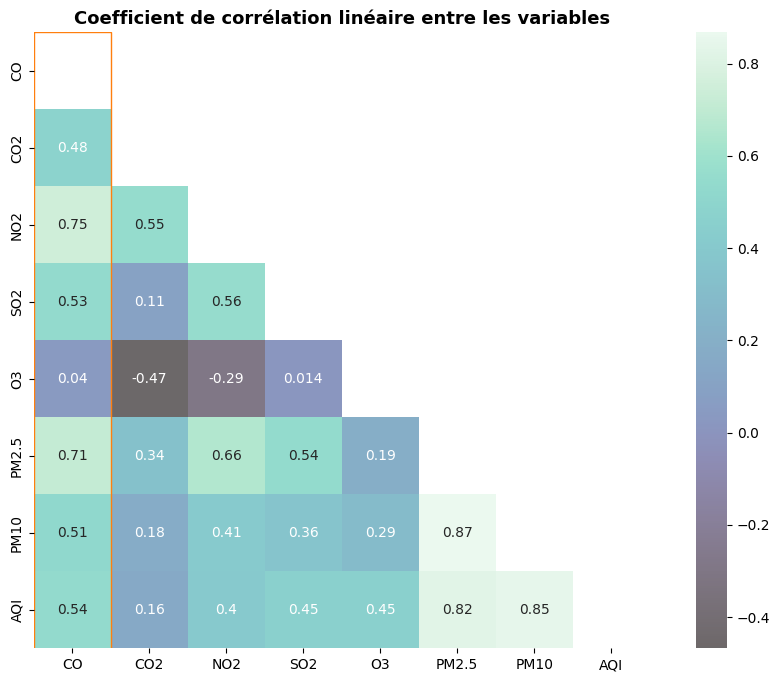

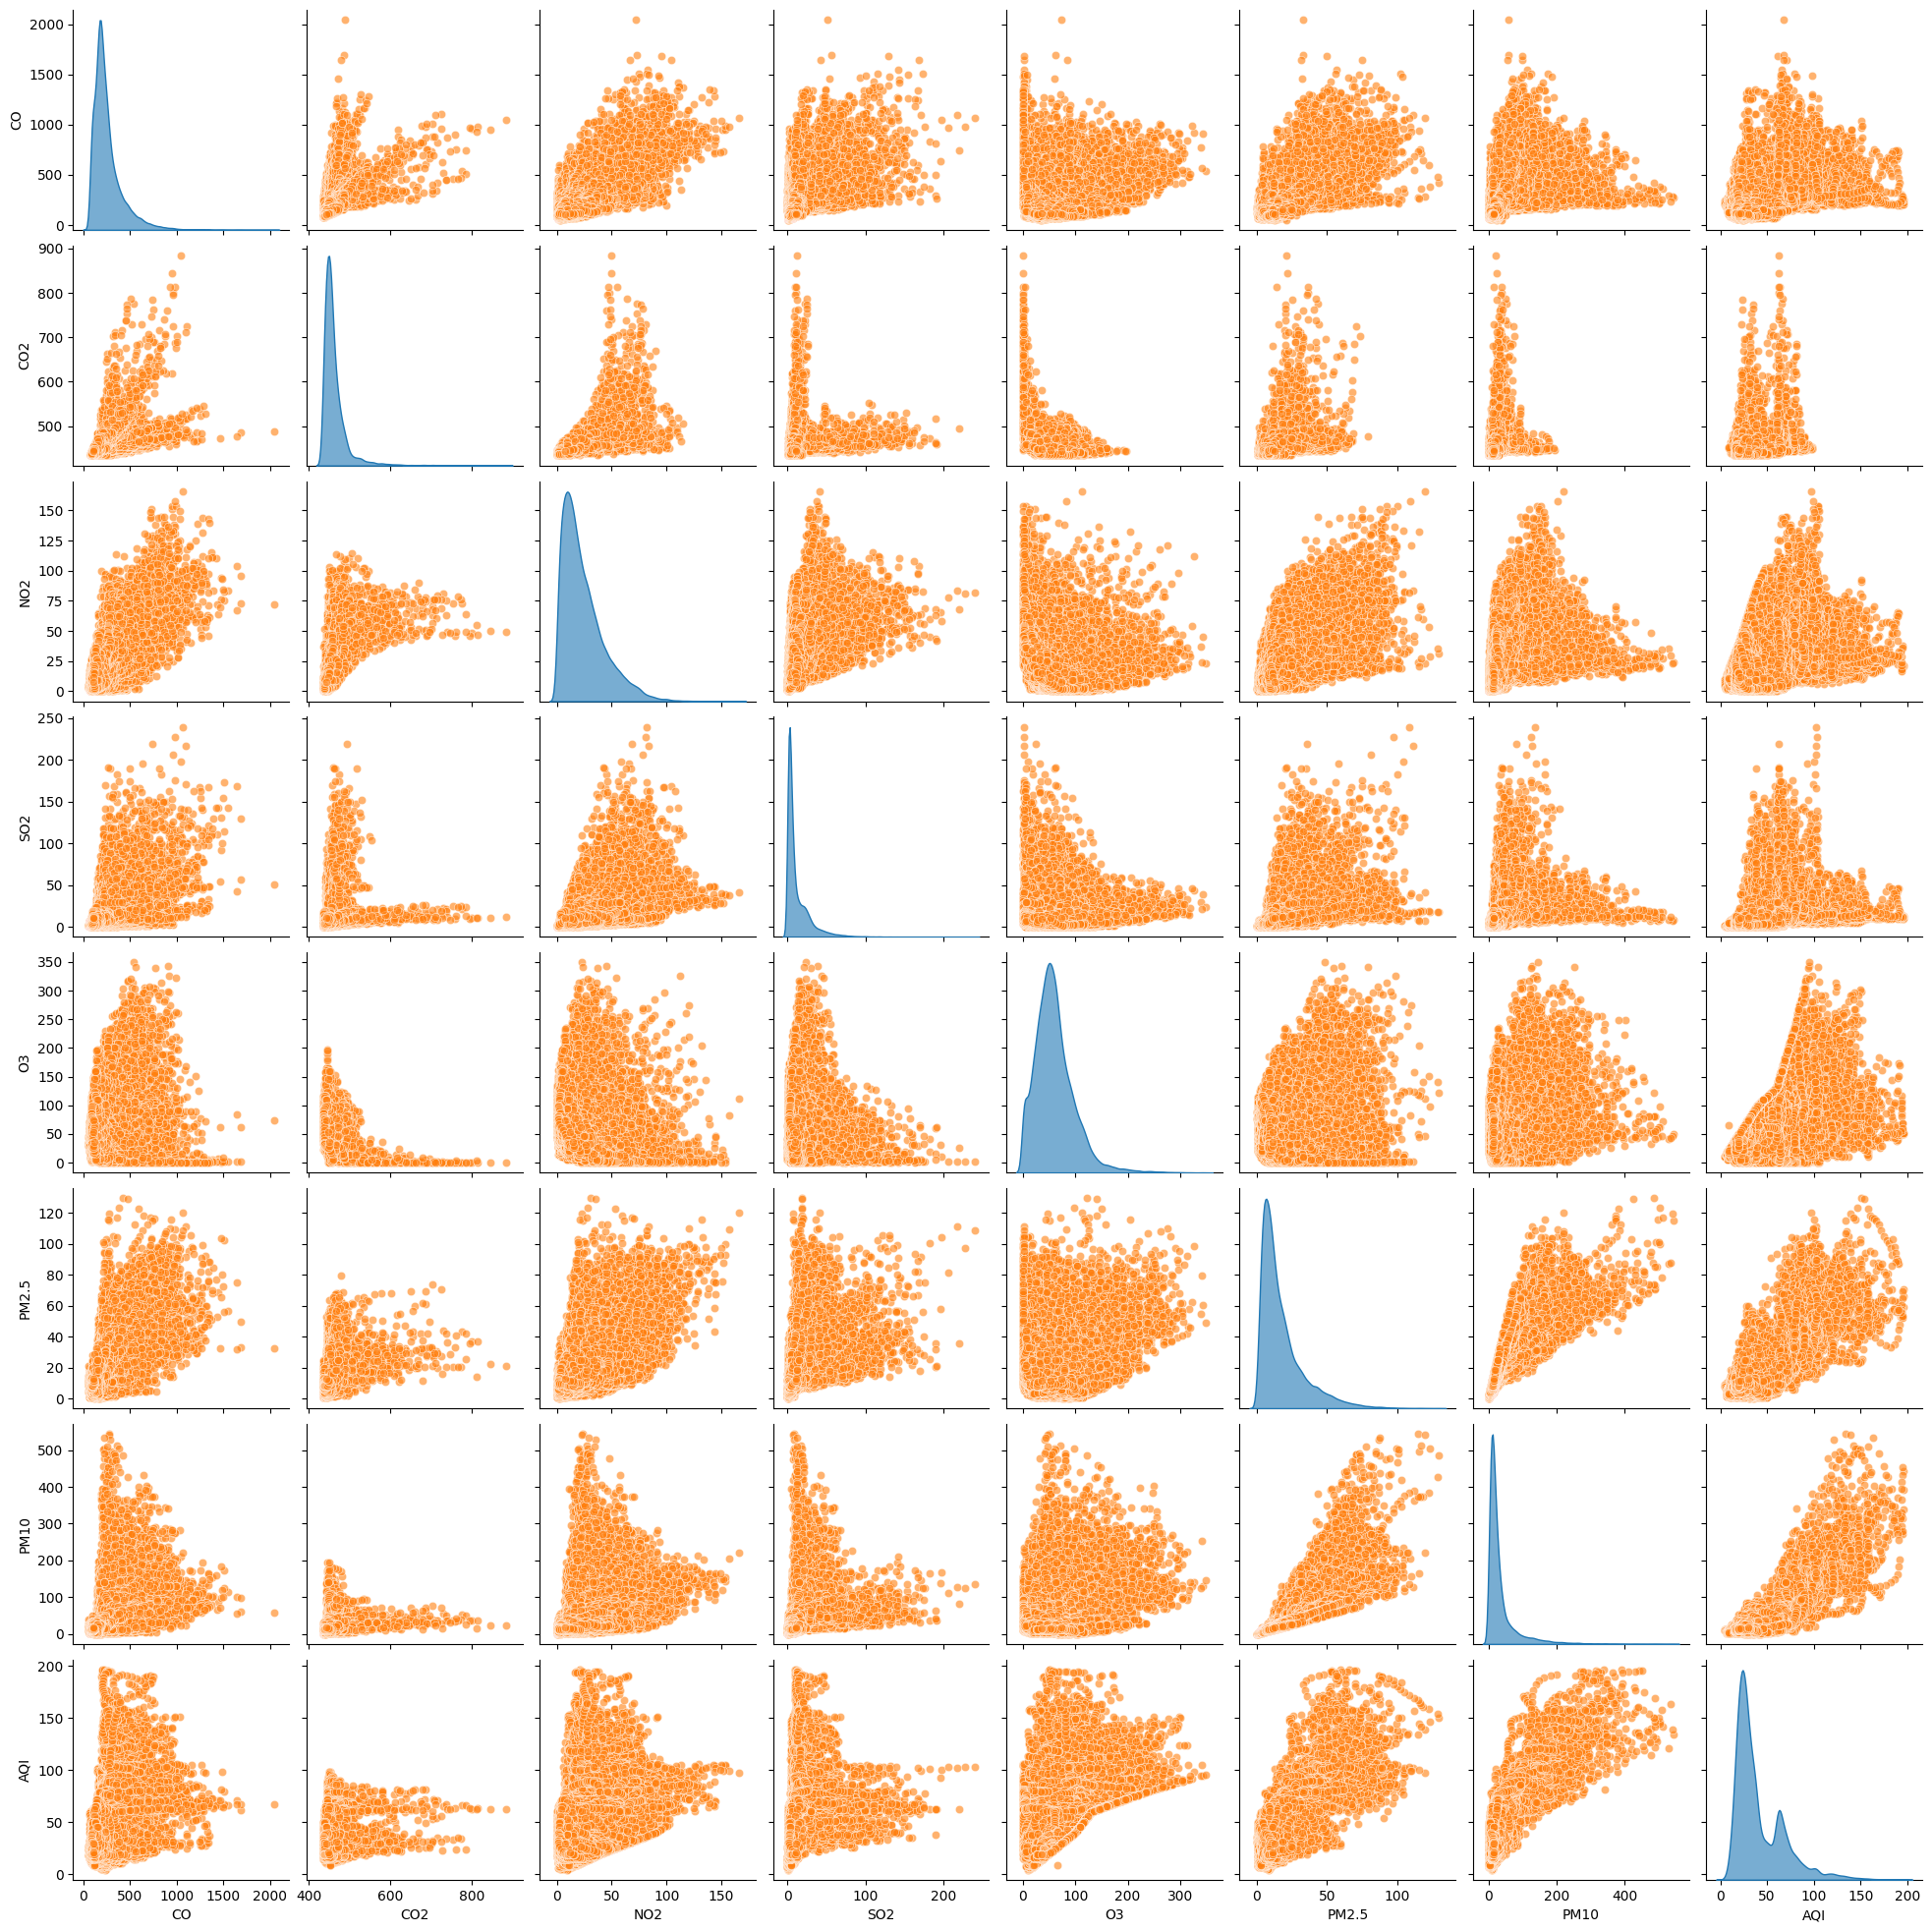

Date    8784
City       6
dtype: int64


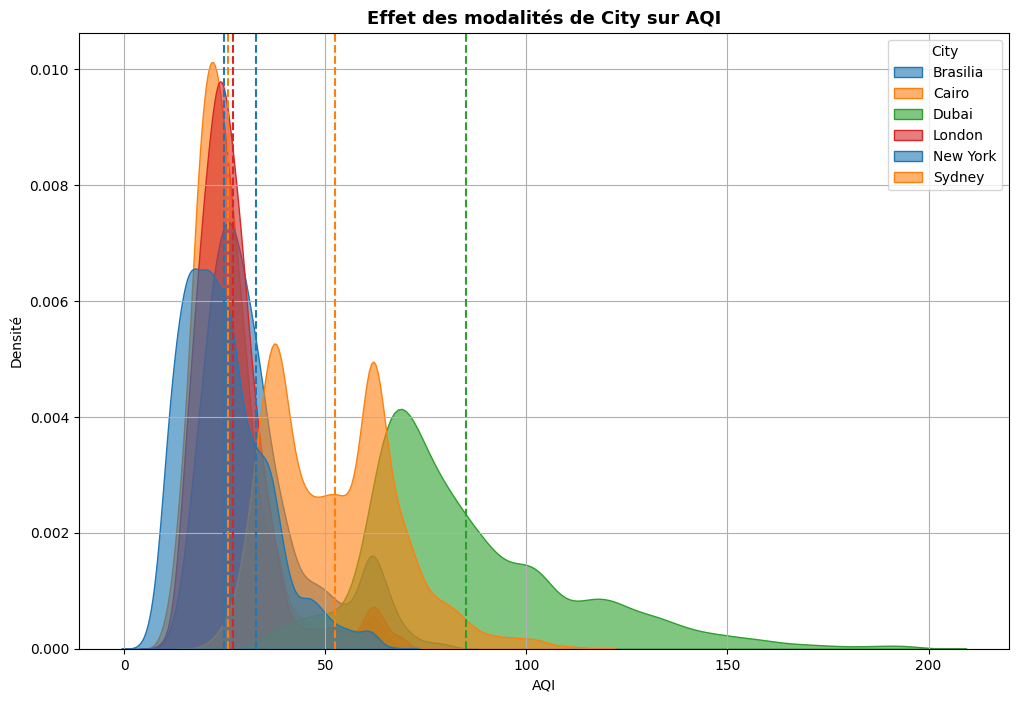

In [8]:
#ANALYSE PRINCIPALE

if __name__ == "__main__":
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

    data = pd.read_csv("Air_Quality.csv")
    data["Date"] = pd.to_datetime(data["Date"])

    quantitative_data = data.select_dtypes(include=np.number)
    qualitative_data = data.select_dtypes(exclude=np.number)

    #Analyse globale
    GlobalAnalysis.print_info(data=data)
    GlobalAnalysis.print_nan_statistics(data=data)

    #Analyse des variables quantitatives
    QuantitativeAnalysis.print_describe(data=quantitative_data)
    QuantitativeAnalysis.plot_linear_correlation(data=quantitative_data, colors=colors)
    QuantitativeAnalysis.plot_pairplot(data=quantitative_data, colors=colors)

    #Analyse des variables qualitatives
    QualitativeAnalysis.print_modalities_number(data=qualitative_data)
    QualitativeAnalysis.plot_modalities_effect_on_target(
        data=data,
        target_column="AQI",
        qualitative_column="City",
        colors=colors,
    )

### 2. Proprocessing et Gestion des Valeurs Manquantes par Liliane

On importe les bibliothèques nécessaires

In [9]:
import pandas as pd
import numpy as np

On charge le jeu de données Air_Quality.csv et on affiche les 20 premières lignes pour avoir un premier aperçu.

In [10]:
df = pd.read_csv("Air_Quality.csv")
df.head(20)


,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000
5,2024-01-01 05:00:00+00:00,Brasilia,239.0,NaN,9.4,1.9,44.0,8.7,12.4,17.600000
6,2024-01-01 06:00:00+00:00,Brasilia,215.0,NaN,6.8,1.7,47.0,7.5,10.7,18.800000
7,2024-01-01 07:00:00+00:00,Brasilia,205.0,NaN,6.0,1.8,46.0,6.1,8.7,18.400000
8,2024-01-01 08:00:00+00:00,Brasilia,201.0,NaN,6.1,2.1,45.0,5.7,8.2,18.000000
9,2024-01-01 09:00:00+00:00,Brasilia,199.0,NaN,5.9,2.2,46.0,5.7,8.2,18.400000


In [23]:
df.columns

Index(['Date', 'City', 'CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10',
       'AQI'],
      dtype='object')

### Afficher le pourcentage des valeurs manquantes

Les statistiques des valeurs manquantes nous indiquent que la colonne CO2 contient beaucoup de valeurs manquantes généralement 100% dans ce type de dataset

In [11]:
#la fonction `print_nan_percentage` calcule et affiche le pourcentage de NaN

def print_nan_percentage(data):
        print(" Pourcentage de valeurs manquantes ".center(50, "="))
        percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)
        print(percent)

print_nan_percentage(data)

======= Pourcentage de valeurs manquantes ========
CO2      81.693989
Date      0.000000
City      0.000000
CO        0.000000
NO2       0.000000
SO2       0.000000
O3        0.000000
PM2.5     0.000000
PM10      0.000000
AQI       0.000000
dtype: float64


#### Suppression de la colonne CO2 car trop de Nans (+80%)

On supprime la colonne CO2 car c'est une décision pratique quand une colonne n'a quasiment aucune information. Si on tente de l'imputer serait peu fiable et n'apporterait pas de valeur.

In [12]:
#Puisque la colonne 'CO2' est presque entièrement vide nous la supprimons.
data.drop(columns=['CO2'], inplace=True)
print("\nLa colonne 'CO2' a été supprimée en raison d'un grand nombre de valeurs manquantes.")


La colonne 'CO2' a été supprimée en raison d'un grand nombre de valeurs manquantes.


### 3. Vérification des Variables Constantes et à Faible Variance

Il est important de s'assurer que nos variables explicatives varient suffisamment pour être utiles.

In [13]:
# Identification des variables qui ont une seule valeur unique (constantes)
constantes = [col for col in data.columns if data[col].nunique() == 1]
print("Variables constantes :", constantes)
#Si des variables constantes sont trouvées, elles sont généralement supprimées car elles n'apportent aucune information.
#Dans ce cas, le résultat est souvent vide

#Identification des variables numériques avec une très faible variance
#Une faible variance signifie que la variable ne change presque pas donc c'est peu utile pour le modèle.

from sklearn.feature_selection import VarianceThreshold
    
sel = VarianceThreshold(threshold=0.01) # Seuil: si la variance est inférieure à 0.01, la variable est considérée à faible variance
#Nous appliquons cette sélection uniquement sur les colonnes numériques
sel.fit(data.select_dtypes(include=np.number).drop(columns=['AQI'], errors='ignore')) # Exclure AQI si c'est notre cible

#Récupération des noms des colonnes identifiées
low_variance_vars = data.select_dtypes(include=np.number).drop(columns=['AQI'], errors='ignore').columns[~sel.get_support()]
print("Variables avec faible variance (seuil 0.01) :", list(low_variance_vars))

#Résultat "0 -> rien à drop" indique qu'aucune variable numérique n'a une variance trop faible

Variables constantes : []
Variables avec faible variance (seuil 0.01) : []


On observe que aucune variable constante ou à très faible variance n'a été trouvée ce qui signifie que toutes nos colonnes actuelles ont un potentiel explicatif.

### 4. Standardisation des Variables Numériques (ML)

La standardisation est une étape clé pour de nombreux modèles de machine learning, surtout ceux basés sur des distances ou des pentes (comme la régression linéaire avec régularisation). Elle met toutes les variables sur la même échell

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
    #Nous standardisons les colonnes des polluants.
    #MPORTANT : Nous n'incluons PAS 'AQI' ici car c'est notre variable cible et nous voulons qu'elle reste dans son échelle d'origine.
cols_to_scale = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']

    #Applique la standardisation (centrage à 0, écart-type à 1)
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
print(f"\nLes colonnes {cols_to_scale} ont été standardisées.")

    #Vérifions à nouveau les statistiques descriptives pour voir l'effet de la standardisation
print("\nStatistiques descriptives après standardisation :")
print(data[cols_to_scale].describe())


Les colonnes ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10'] ont été standardisées.

Statistiques descriptives après standardisation :
                 CO           NO2           SO2            O3         PM2.5  \
count  5.270400e+04  5.270400e+04  5.270400e+04  5.270400e+04  5.270400e+04   
mean  -3.451331e-17  8.628327e-17 -1.725665e-16  6.471245e-17  8.628327e-18   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -1.292438e+00 -1.244780e+00 -7.279935e-01 -1.570656e+00 -1.122528e+00   
25%   -6.219631e-01 -7.438313e-01 -5.947872e-01 -6.548326e-01 -6.885757e-01   
50%   -2.835927e-01 -2.687046e-01 -3.978737e-01 -1.576715e-01 -3.312032e-01   
75%    2.991563e-01  4.801362e-01  2.449912e-01  4.703215e-01  3.388701e-01   
max    1.119594e+01  7.322992e+00  1.315441e+01  7.561409e+00  7.135328e+00   

               PM10  
count  5.270400e+04  
mean   8.628327e-17  
std    1.000009e+00  
min   -7.336907e-01  
25%   -5.252039e-01  
50%   -3.456163e-01  
75

Après standardisation, les moyennes des colonnes seront très proches de 0 et les écarts-types très proches de 1. Cela aide les algorithmes à converger plus rapidement et à interpréter plus facilement les poids des variables.

### 5. Créer des variables temporelles utiles (pour voir des éventuels effets cachées du temps dans les données)

Pour répondre à la question de la problématique concernant la temporalité, nous allons extraire des informations utiles de la colonne 'Date'.

In [15]:
#Vérifier que la colonne 'Date' est bien de type datetime
print(f"\nType de la colonne 'Date' avant extraction : {data.dtypes['Date']}")

#Extraction de nouvelles variables temporelles à partir de la date
data["Heure"] = data["Date"].dt.hour #l'heure 
data["Jour"] = data["Date"].dt.day #le jour
data["Mois"] = data["Date"].dt.month #le mois
data["Jour_semaine"] = data["Date"].dt.dayofweek #le jour de la semaine

print("\nNouvelles variables temporelles extraites : 'Heure', 'Jour', 'Mois', 'Jour_semaine'.")


Type de la colonne 'Date' avant extraction : datetime64[ns, UTC]

Nouvelles variables temporelles extraites : 'Heure', 'Jour', 'Mois', 'Jour_semaine'.


In [16]:
#vérifier que la colonne est bien de type datetime
print(df.dtypes["Date"])

object


Ces nouvelles variables nous permettront de capturer des cycles quotidiens (Heure, Jour_semaine), mensuels (Mois) ou annuels (Jour) qui peuvent influencer la qualité de l'air. Par exemple, la pollution peut être plus élevée aux heures de pointe ou certains jours de la semaine.

### 6. Vérification finale de propreté du dataset

In [17]:
print("\n" + "Informations finales sur le DataFrame".center(70, "-") + "\n")
print(data.info()) #Aperçu du DF après toutes les modifications

print("\n" + "Statistiques descriptives finales".center(70, "-") + "\n")
print(data.describe()) #Statistiques descriptives qui inclut les nouvelles colonnes

print("\n" + "Valeurs manquantes finales".center(70, "-") + "\n")
print(data.isnull().sum()) #on s'assure qu'il n'y a plus de valeurs manquantes


----------------Informations finales sur le DataFrame-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          52704 non-null  datetime64[ns, UTC]
 1   City          52704 non-null  object             
 2   CO            52704 non-null  float64            
 3   NO2           52704 non-null  float64            
 4   SO2           52704 non-null  float64            
 5   O3            52704 non-null  float64            
 6   PM2.5         52704 non-null  float64            
 7   PM10          52704 non-null  float64            
 8   AQI           52704 non-null  float64            
 9   Heure         52704 non-null  int32              
 10  Jour          52704 non-null  int32              
 11  Mois          52704 non-null  int32              
 12  Jour_semaine  52704 non-null  int32        

### 7. Analyse de l’utilité des variables pour AQI (correlation)

In [18]:
# Corrélation avec AQI
correlation_aqi = df.select_dtypes(include=np.number).corr()['AQI'].sort_values(ascending=False)
print(correlation_aqi)

AQI      1.000000
PM10     0.845944
PM2.5    0.822101
CO       0.537100
O3       0.452599
SO2      0.451506
NO2      0.403690
CO2      0.157839
Name: AQI, dtype: float64


==> conclusion étape 7 : PM10 et PM2.5 = correlation forte avec AQI. Mais les autres variables sont aussi significatives (à prendre en compte).
-> on peut faire une visualisation pour bien comprendre cela.

